In [31]:
# Do the necessary imports
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, transpile, assemble, execute
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.extensions import Initialize
from qiskit.circuit.library import RYGate
import matplotlib.pyplot as plt


In [18]:
RYGate(np.pi/2).to_matrix()

array([[ 0.70710678+0.j, -0.70710678+0.j],
       [ 0.70710678+0.j,  0.70710678+0.j]])

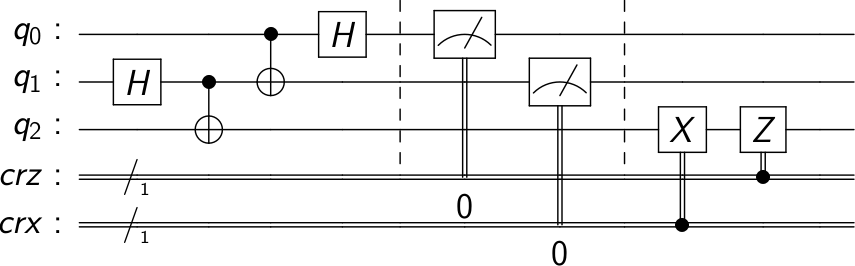

In [75]:
# SETUP
# Protocol uses 3 qubits and 2 classical bits in 2 different registers

qr = QuantumRegister(3, name="q")    # Protocol uses 3 qubits
crz = ClassicalRegister(1, name="crz") # and 2 classical bits
crx = ClassicalRegister(1, name="crx") # in 2 different registers
teleportation_circuit = QuantumCircuit(qr, crz, crx)


def create_bell_pair(qc, a, b):
    """Creates a bell pair in qc using qubits a & b"""
    qc.h(a) # Put qubit a into state |+>
    qc.cx(a,b) # CNOT with a as control and b as target
   

def alice_gates(qc, psi, a):
    qc.cx(psi, a)
    qc.h(psi)

    
def measure_and_send(qc, a, b):
    """Measures qubits a & b and 'sends' the results to Bob"""
    qc.barrier()
    qc.measure(a,0)
    qc.measure(b,1)
    
    
# This function takes a QuantumCircuit (qc), integer (qubit)
# and ClassicalRegisters (crz & crx) to decide which gates to apply
def bob_gates(qc, qubit, crz, crx):
    # Here we use c_if to control our gates with a classical
    # bit instead of a qubit
    qc.x(qubit).c_if(crx, 1) # Apply gates if the registers 
    qc.z(qubit).c_if(crz, 1) # are in the state '1'

    
## SETUP
# Protocol uses 3 qubits and 2 classical bits in 2 different registers
qr = QuantumRegister(3, name="q")
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")
teleportation_circuit = QuantumCircuit(qr, crz, crx)

## STEP 1
create_bell_pair(teleportation_circuit, 1, 2)

## STEP 2
alice_gates(teleportation_circuit, 0, 1)
tel_circuit_premeas = teleportation_circuit.copy()
simulator = Aer.get_backend("unitary_simulator")
gates_unitary = execute(teleportation_circuit, simulator).result().get_unitary()  

## STEP 3
measure_and_send(teleportation_circuit, 0, 1)

## STEP 4
teleportation_circuit.barrier() # Use barrier to separate steps
bob_gates(teleportation_circuit, 2, crz, crx)
teleportation_circuit.draw('latex')

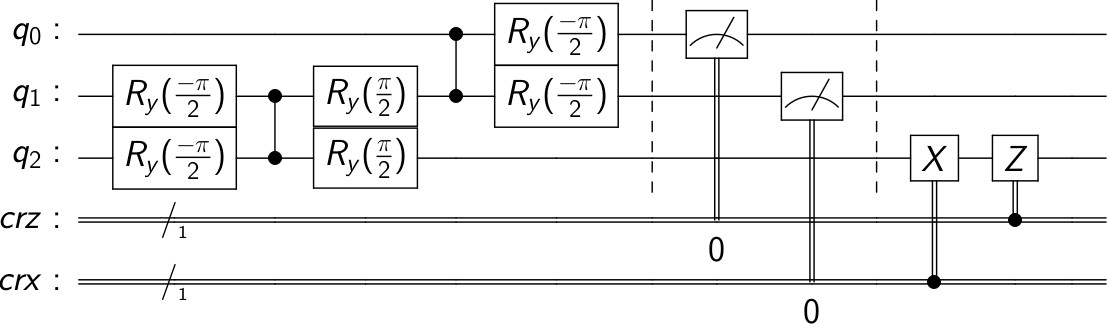

In [74]:
# TRANSPILED

qr = QuantumRegister(3, name="q")    # Protocol uses 3 qubits
crz = ClassicalRegister(1, name="crz") # and 2 classical bits
crx = ClassicalRegister(1, name="crx") # in 2 different registers
teleportation_circuit = QuantumCircuit(qr, crz, crx)


def create_bell_pair_tr(qc, a, b):
    """Creates a bell pair in qc using qubits a & b"""
    qc.ry(-np.pi/2, a)
    qc.ry(-np.pi/2, b)
    qc.cz(a,b)
    qc.ry(np.pi/2, b)
   

def alice_gates(qc, psi, a):
    qc.ry(np.pi/2, a)
    qc.cz(psi, a)

    qc.ry(-np.pi/2, a)
#     qc.z(a)
    qc.ry(-np.pi/2, psi)
#     qc.z(psi)

    
def measure_and_send(qc, a, b):
    """Measures qubits a & b and 'sends' the results to Bob"""
    qc.barrier()
    qc.measure(a,0)
    qc.measure(b,1)
    
    
# This function takes a QuantumCircuit (qc), integer (qubit)
# and ClassicalRegisters (crz & crx) to decide which gates to apply
def bob_gates(qc, qubit, crz, crx):
    # Here we use c_if to control our gates with a classical
    # bit instead of a qubit
    qc.x(qubit).c_if(crx, 1) # Apply gates if the registers 
    qc.z(qubit).c_if(crz, 1) # are in the state '1'

    
## SETUP
# Protocol uses 3 qubits and 2 classical bits in 2 different registers
qr = QuantumRegister(3, name="q")
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")
teleportation_circuit = QuantumCircuit(qr, crz, crx)

## STEP 1
create_bell_pair_tr(teleportation_circuit, 1, 2)

## STEP 2

alice_gates(teleportation_circuit, 0, 1)

simulator = Aer.get_backend("unitary_simulator")
gates_unitary_tr = execute(teleportation_circuit, simulator).result().get_unitary()  


## STEP 3
measure_and_send(teleportation_circuit, 0, 1)

## STEP 4
teleportation_circuit.barrier() # Use barrier to separate steps
bob_gates(teleportation_circuit, 2, crz, crx)
teleportation_circuit.draw('latex')

[1.+0.j 1.-0.j 1.-0.j 1.-0.j 1.+0.j 1.-0.j 1.-0.j 1.-0.j]


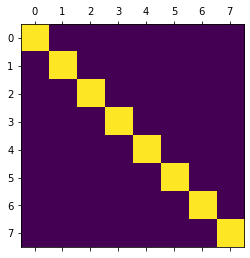

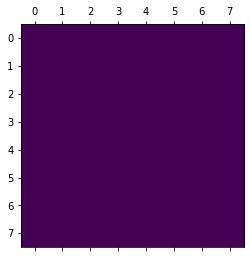

In [72]:
equiv = np.around(gates_unitary_tr.conj().T@gates_unitary, 5)
print(equiv.diagonal())
plt.matshow(equiv.real)
plt.matshow(equiv.imag)

In [57]:
tel_circuit_premeas.draw()

┌───┐
  q_0: ────────────■──┤ H ├
       ┌───┐     ┌─┴─┐└───┘
  q_1: ┤ H ├──■──┤ X ├─────
       └───┘┌─┴─┐└───┘     
  q_2: ─────┤ X ├──────────
            └───┘          
crz: 1/════════════════════
                           
crx: 1/════════════════════

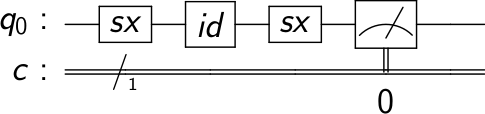

In [86]:
qc_ramsey = QuantumCircuit(1, 1)
qc_ramsey.sx(0)
qc_ramsey.i(0)
qc_ramsey.sx(0)
qc_ramsey.measure([0], [0])
qc_ramsey.draw('latex')

In [123]:
qc_parity = QuantumCircuit(3,1)
qc_parity.y(2)
qc_parity.h(2)
qc_parity.cz(1,2)
qc_parity.cz(0,2)
qc_parity.h(2)
qc_parity.draw()


q_0: ──────────────■──────
                   │      
q_1: ───────────■──┼──────
     ┌───┐┌───┐ │  │ ┌───┐
q_2: ┤ Y ├┤ H ├─■──■─┤ H ├
     └───┘└───┘      └───┘
c: 1/═════════════════════

In [124]:
qc_parity_n = QuantumCircuit(3,1)
# qc_parity_n.y(2)
qc_parity_n.ry(np.pi/2, 2)
qc_parity_n.cz(1,2)
qc_parity_n.cz(0,2)
qc_parity_n.ry(np.pi/2, 2)
qc_parity_n.draw()

q_0: ───────────────■────────────
                    │            
q_1: ────────────■──┼────────────
     ┌─────────┐ │  │ ┌─────────┐
q_2: ┤ RY(π/2) ├─■──■─┤ RY(π/2) ├
     └─────────┘      └─────────┘
c: 1/════════════════════════════

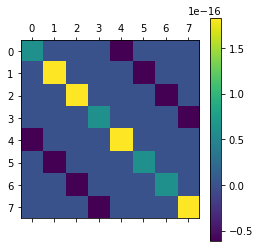

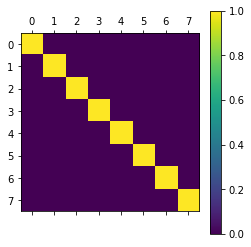

In [125]:
simulator = Aer.get_backend("unitary_simulator")
u1 = execute(qc_parity, simulator).result().get_unitary()
u1_n = execute(qc_parity_n, simulator).result().get_unitary()

plt.matshow((u1@u1_n.conj().T).real)
plt.colorbar()
plt.matshow((u1@u1_n.conj().T).imag)
plt.colorbar()